## 8.1 MNISTデータベース

In [50]:
from keras.datasets import mnist
import warnings
warnings.simplefilter('ignore')

In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

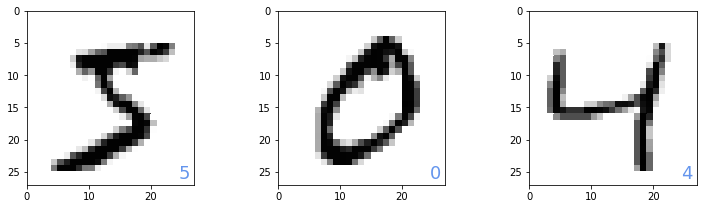

In [54]:
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26,  '%d' % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
plt.show()

## 8.2 2層フィードフォワードネットワークモデル

In [55]:
from keras.utils import np_utils

In [56]:
# 28*28の行列で表された画像データを1つのベクトル（784）にする
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
# 画像を1-of-K符号化法に変更
y_train = np_utils.to_categorical(y_train, num_classes)

# 同じ処理
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [57]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [58]:
model = Sequential()
# 層の追加
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
# 学習方法の設定
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [2]:
import time

In [3]:
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))

NameError: name 'model' is not defined